<a href="https://colab.research.google.com/github/scwandy/Stock/blob/main/Target_Stock_list.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a simple stock screener for finding stocks that last trading turnover is higher than 20 days average.



In [ ]:
pip install yfinance mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 6.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import yfinance as yf

# Read the CSV file into a DataFrame
US_listed_data = pd.read_csv('US listed.csv')

print(US_listed_data.head())



  Symbol                                               Name
0      A             Agilent Technologies Inc. Common Stock
1     AA                    Alcoa Corporation Common Stock 
2    AAC  Ares Acquisition Corporation Class A Ordinary ...
3    AAL          American Airlines Group Inc. Common Stock
4    AAN         Aarons Holdings Company Inc. Common Stock 


In [ ]:
# Print the column names
print(US_listed_data.columns)

Index(['Symbol', 'Name'], dtype='object')


In [ ]:
# Select the ticker symbol column and print the first 5 rows
tickers = US_listed_data['Symbol']
print(tickers.head())

0      A
1     AA
2    AAC
3    AAL
4    AAN
Name: Symbol, dtype: object


Let's test the first 100 stocks

In [ ]:
# Create an empty list to store the tickers that meet the criteria
target_tickers100 = []

# Loop over each ticker
for ticker in tickers[:100]:
    try:
        # Download the historical data for the ticker
        data = yf.download(ticker, start="2022-01-01", end="2022-04-30", interval="1d", progress=False)
        
        # Compute the daily turnover and store it in the dictionary
        data['Turnover'] = data['Volume'] * data['Close']
        avg_turnover = data['Turnover'].rolling(window=20).mean().dropna().iloc[-1]

        # Check if the last close turnover is 5 times more than the 20-day average
        last_close_turnover = data['Turnover'][-1]
        if last_close_turnover > 5 * avg_turnover:
            target_tickers100.append(ticker)
    except:
        print(f"Unable to retrieve data for {ticker}")

# Print the list of target tickers
print(target_tickers100)


1 Failed download:
- ACDC: Data doesn't exist for startDate = 1641013200, endDate = 1651291200
Unable to retrieve data for ACDC

1 Failed download:
- AESI: Data doesn't exist for startDate = 1641013200, endDate = 1651291200
Unable to retrieve data for AESI
['ACCD']


In [ ]:
# Create an empty list to store the tickers that meet the criteria
target_tickers = []

# Loop over each ticker
for ticker in tickers:
    try:
        # Download the historical data for the ticker
        data = yf.download(ticker, start="2022-01-01", end="2022-04-30", interval="1d", progress=False)
        
        # Compute the daily turnover and store it in the dictionary
        data['Turnover'] = data['Volume'] * data['Close']
        avg_turnover = data['Turnover'].rolling(window=20).mean().dropna().iloc[-1]

        # Check if the last close turnover is 5 times more than the 20-day average
        last_close_turnover = data['Turnover'][-1]
        if last_close_turnover > 3 * avg_turnover:
            target_tickers.append(ticker)
    except:
        print(f"Unable to retrieve data for {ticker}")

# Print the list of target tickers
print(target_tickers)


1 Failed download:
- ACDC: Data doesn't exist for startDate = 1641013200, endDate = 1651291200
Unable to retrieve data for ACDC

1 Failed download:
- AESI: Data doesn't exist for startDate = 1641013200, endDate = 1651291200
Unable to retrieve data for AESI

1 Failed download:
- AIXI: Data doesn't exist for startDate = 1641013200, endDate = 1651291200
Unable to retrieve data for AIXI

1 Failed download:
- ALVO: Data doesn't exist for startDate = 1641013200, endDate = 1651291200
Unable to retrieve data for ALVO

1 Failed download:
- AMPX: Data doesn't exist for startDate = 1641013200, endDate = 1651291200
Unable to retrieve data for AMPX

1 Failed download:
- APE: Data doesn't exist for startDate = 1641013200, endDate = 1651291200
Unable to retrieve data for APE
Unable to retrieve data for APLD

1 Failed download:
- ATAT: Data doesn't exist for startDate = 1641013200, endDate = 1651291200
Unable to retrieve data for ATAT

1 Failed download:
- BAM: Data doesn't exist for startDate = 1641

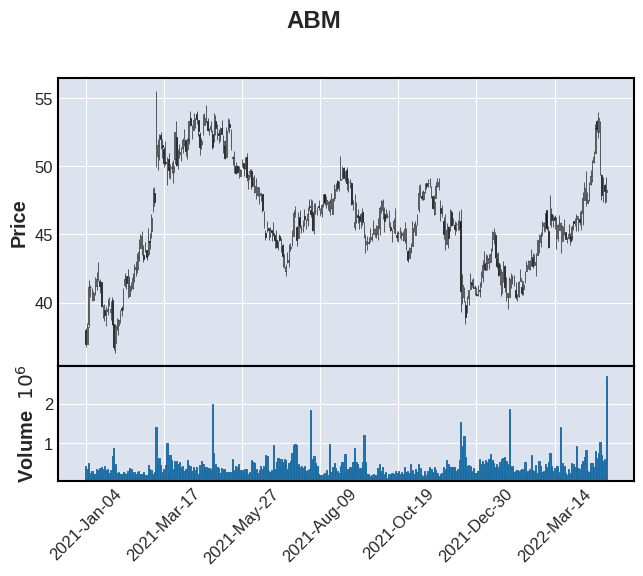

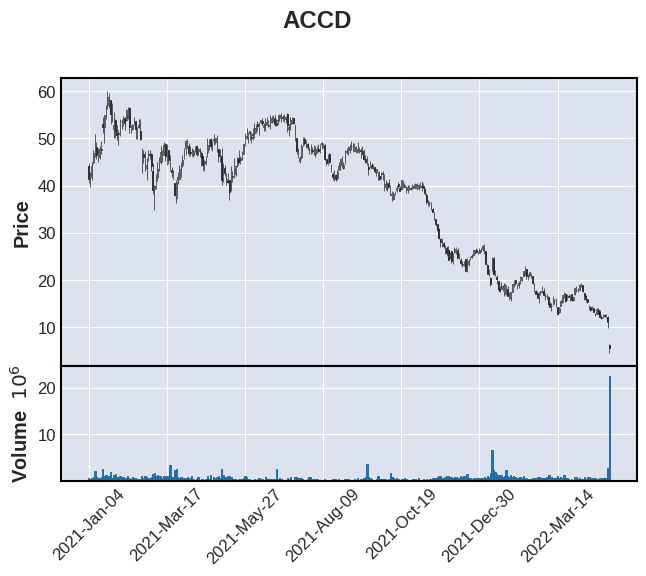

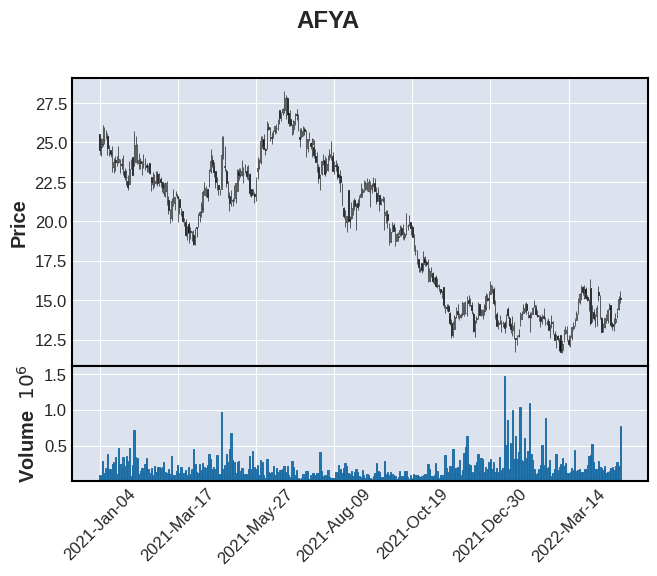

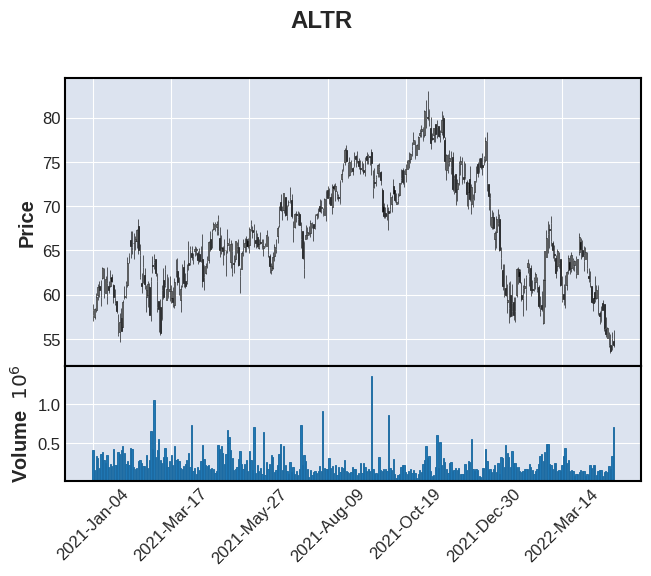

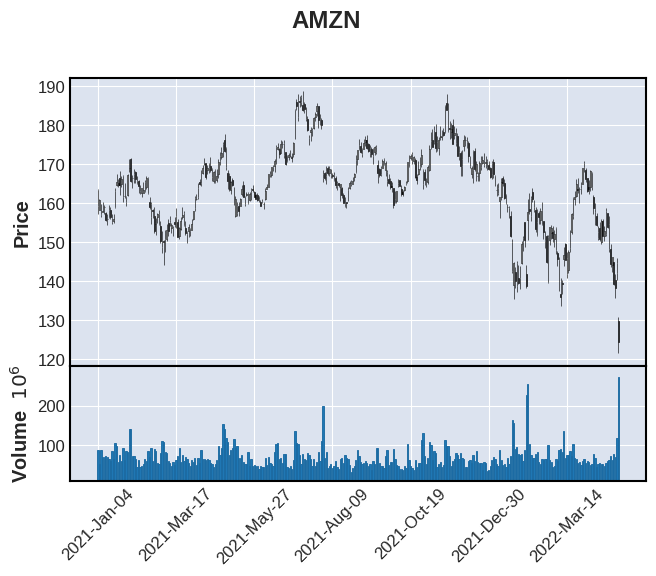

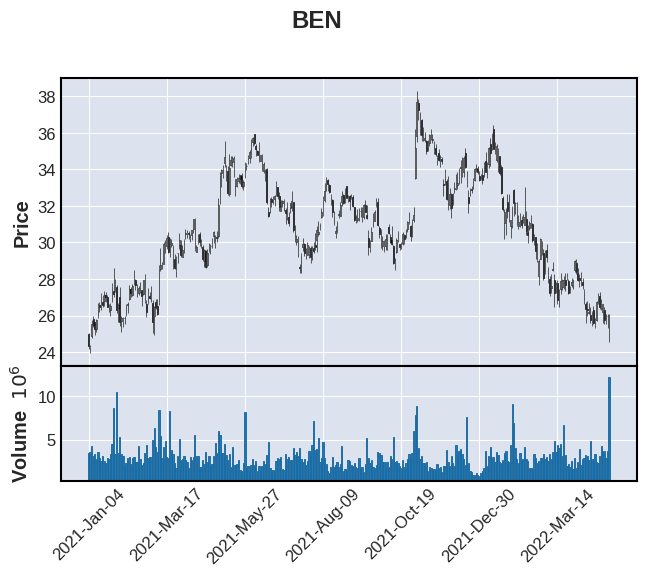

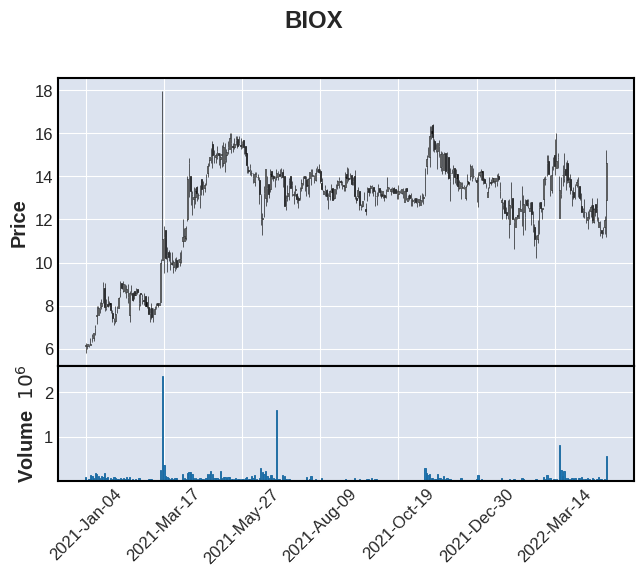

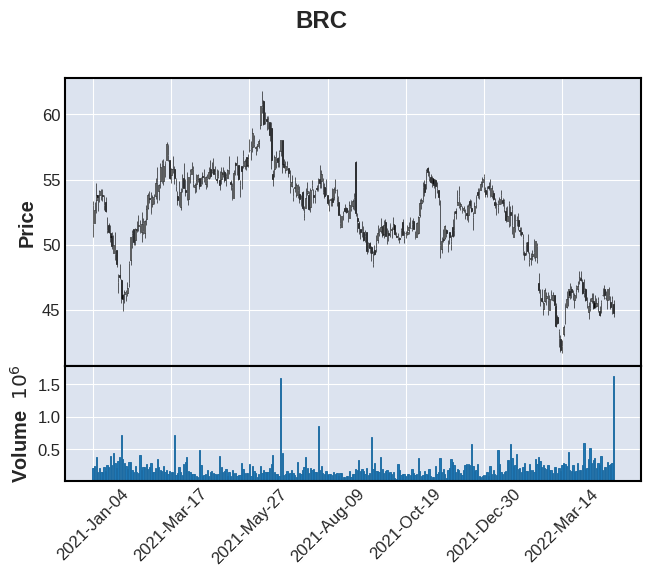

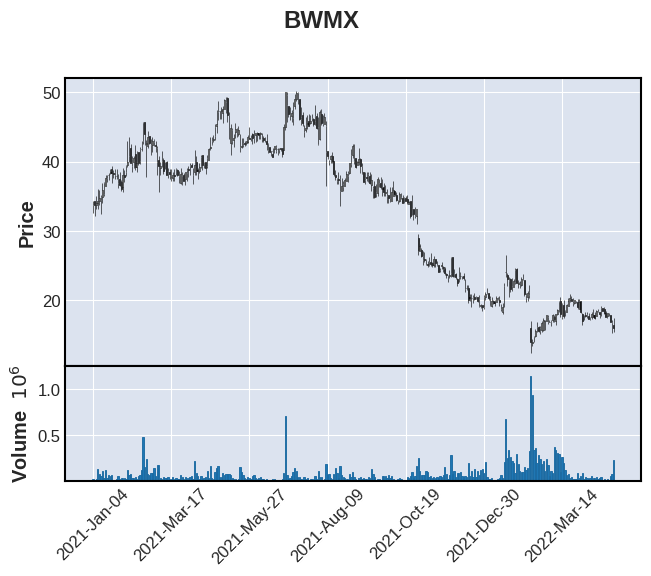

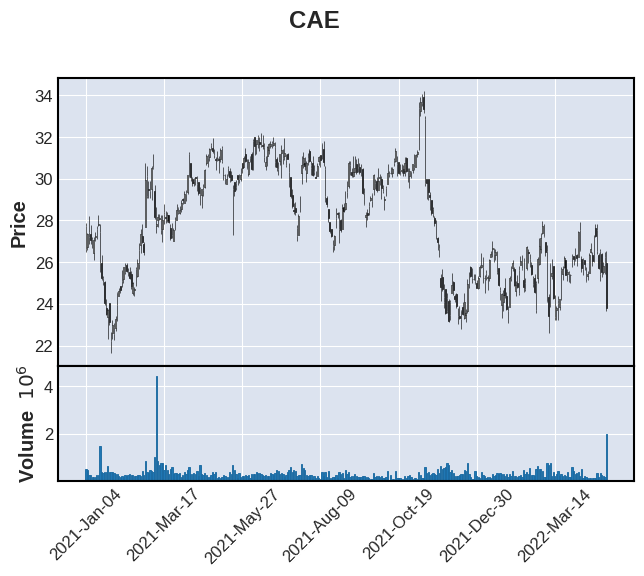

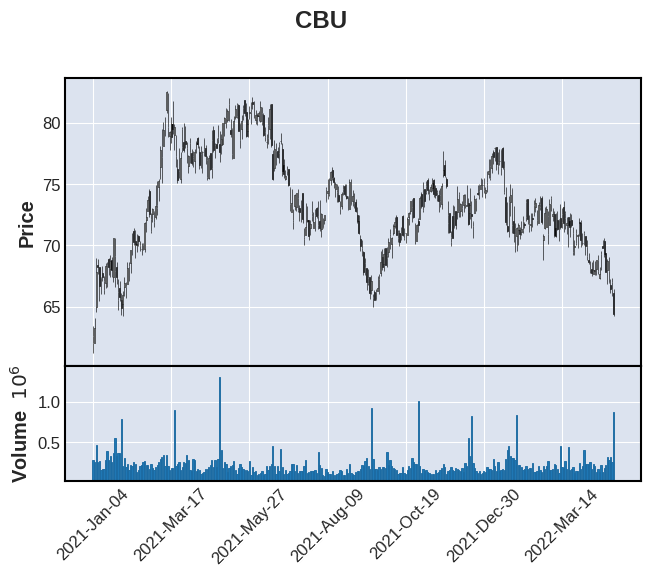

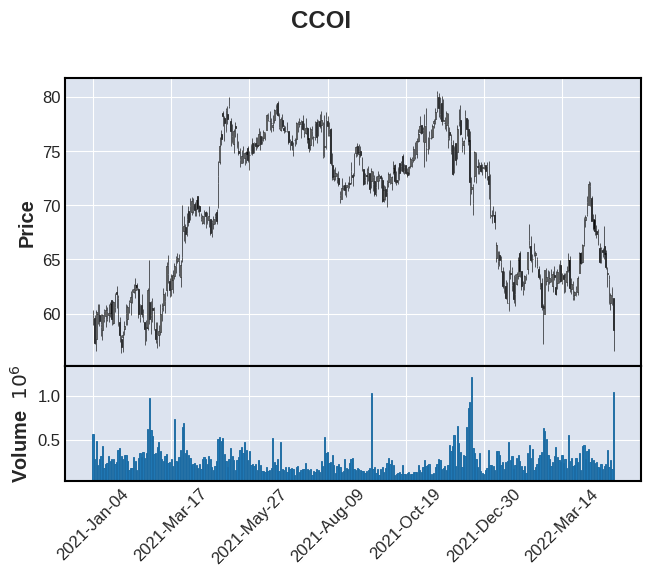

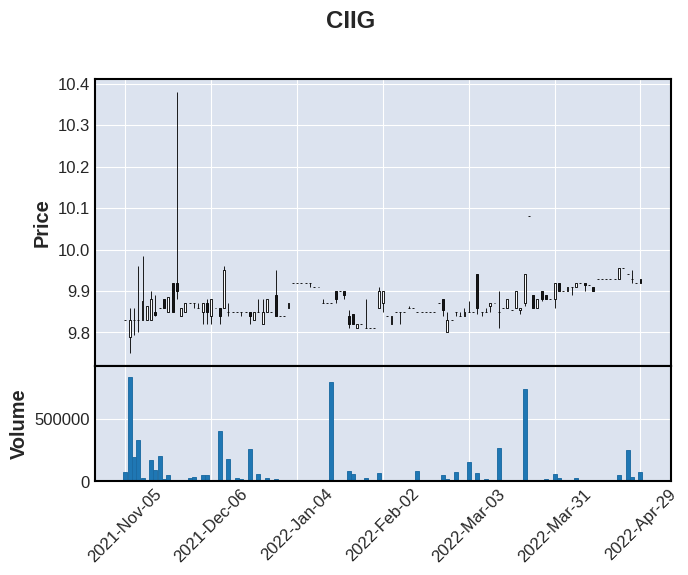

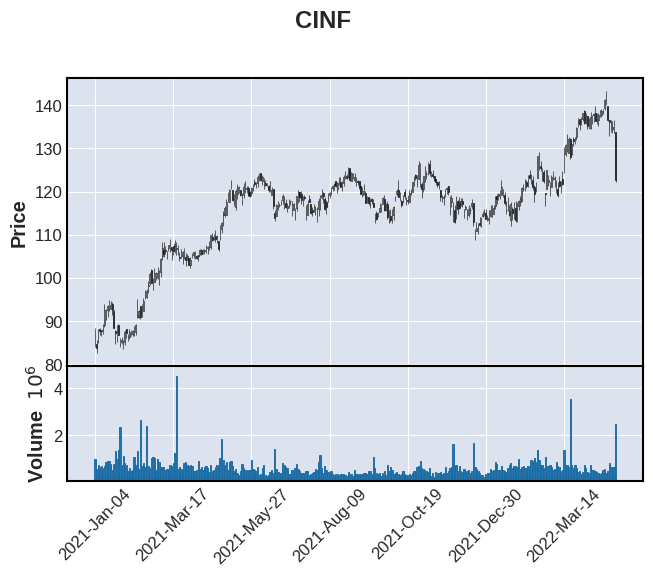

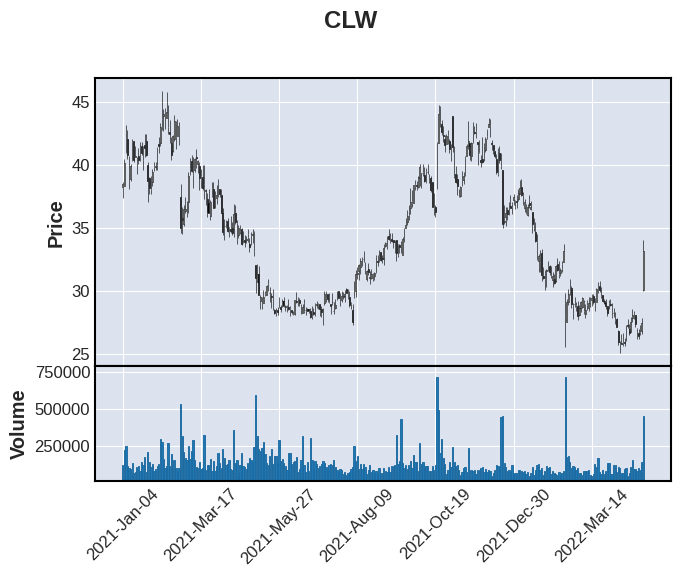

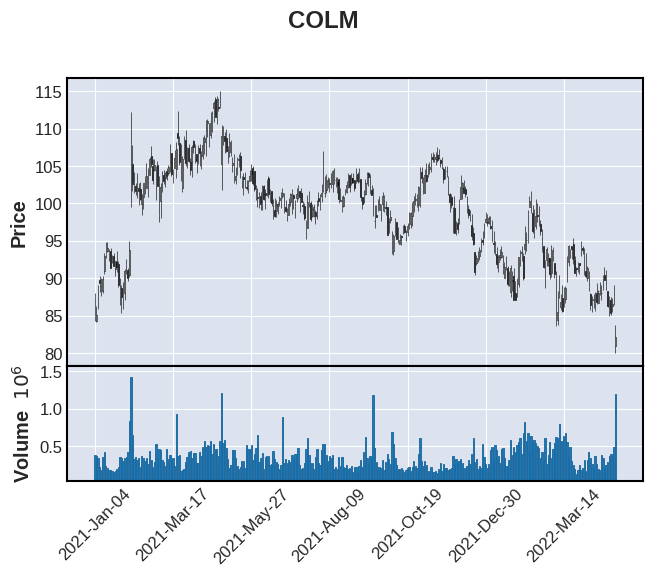

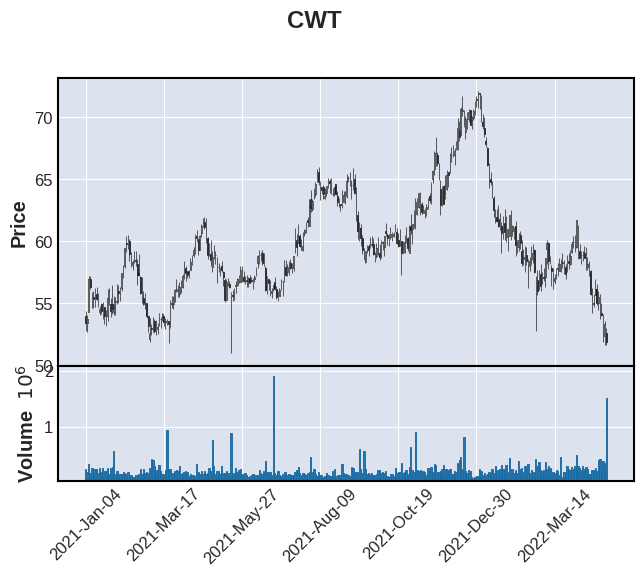

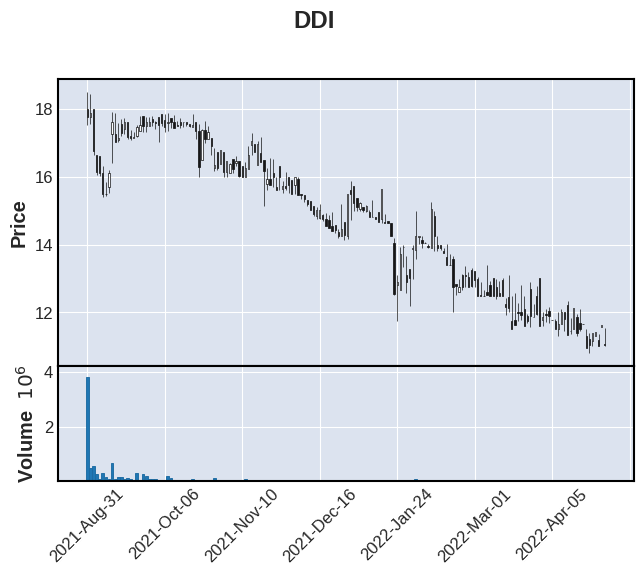

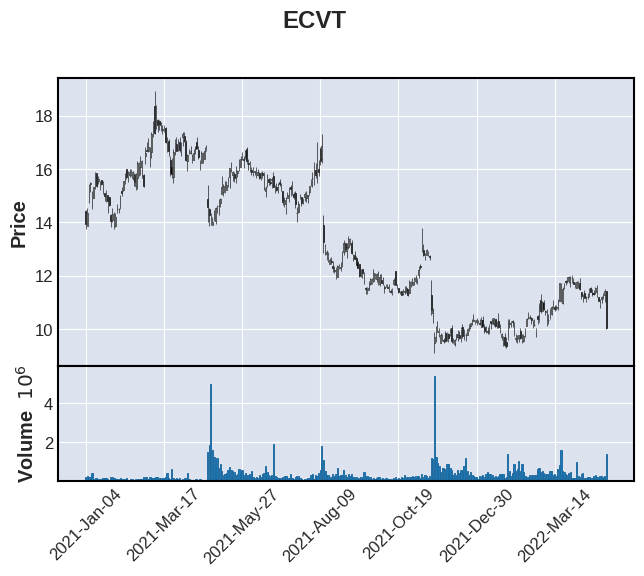

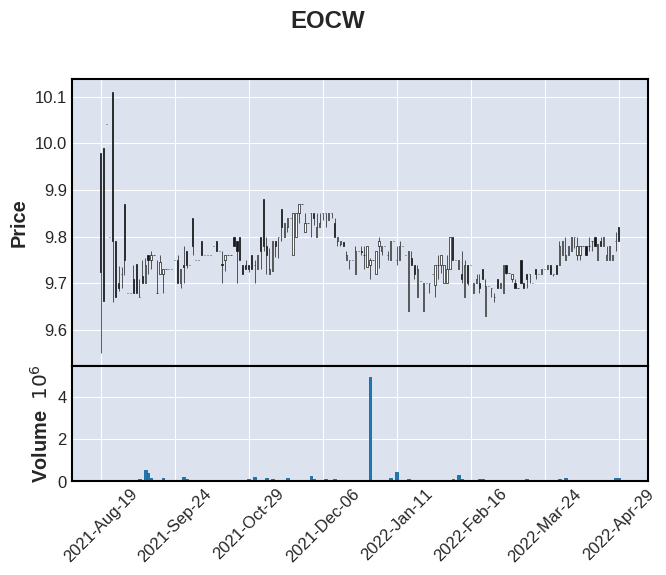

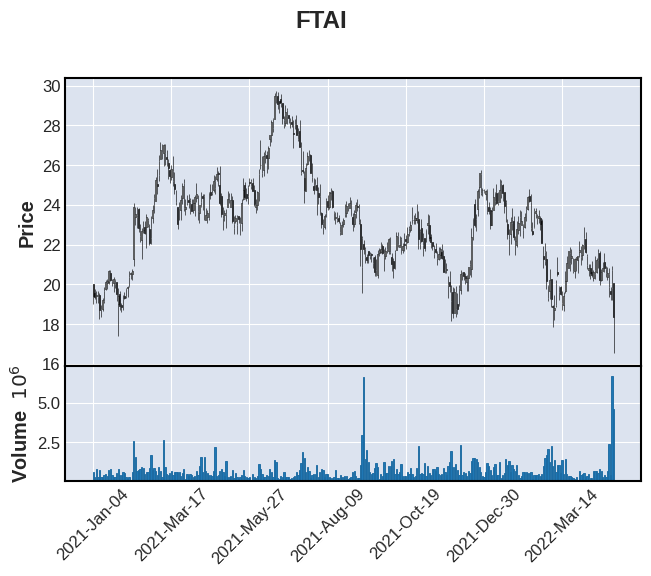

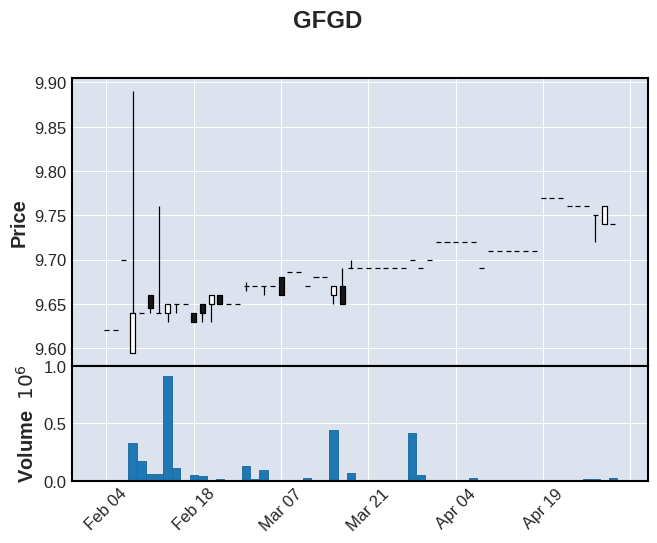

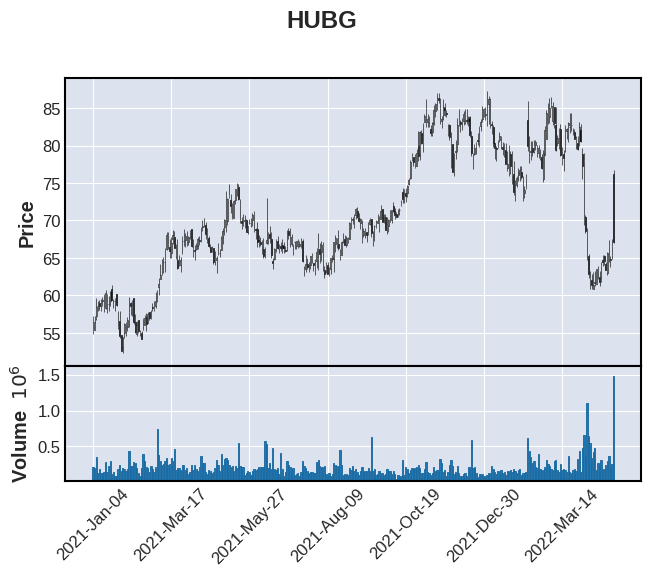

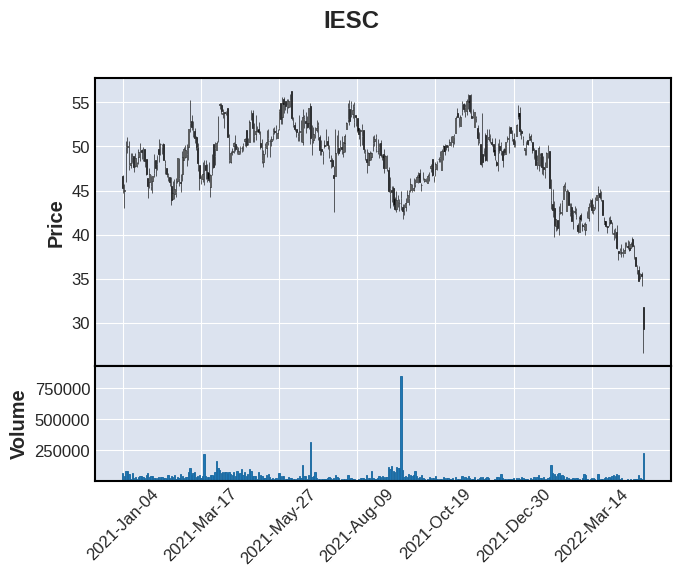

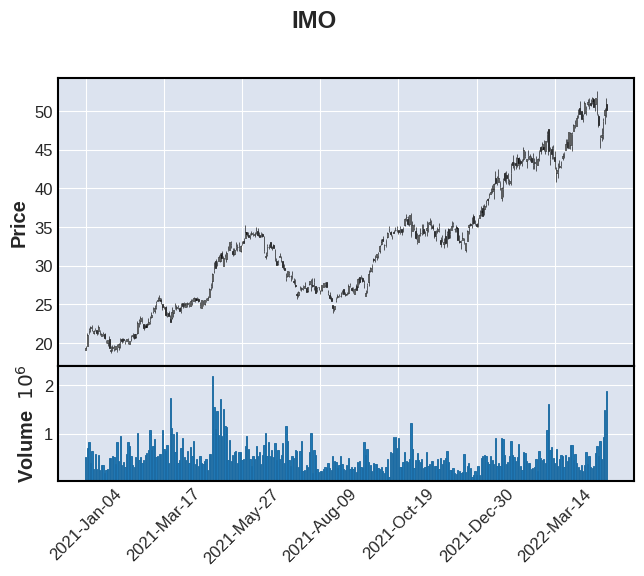

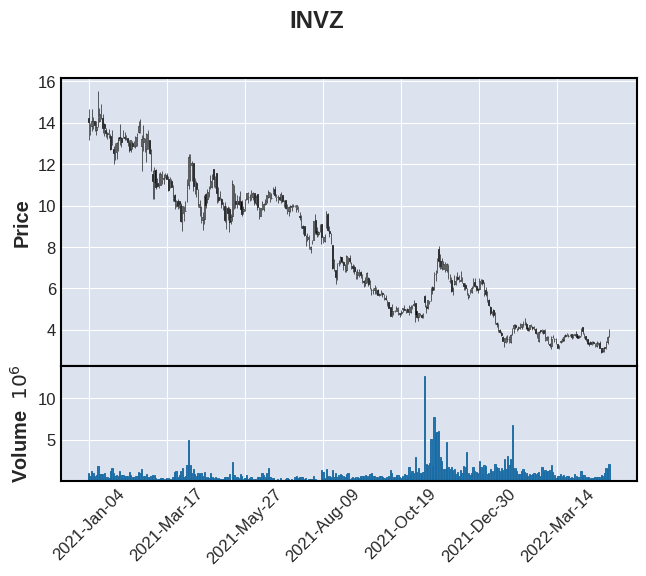

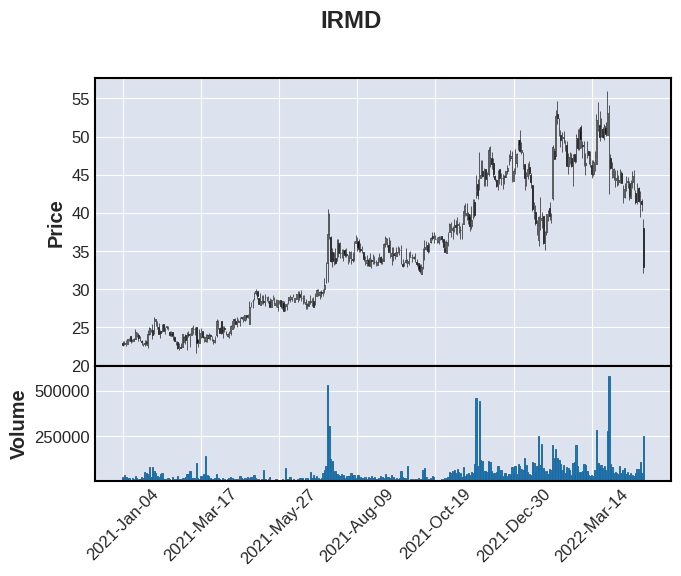

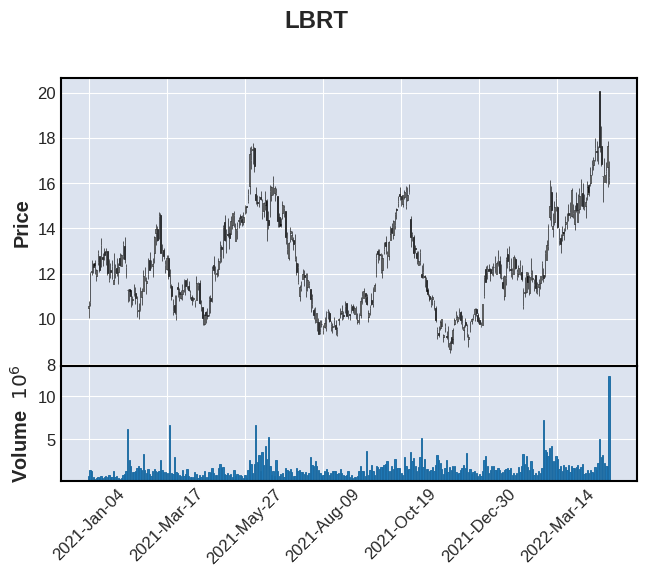

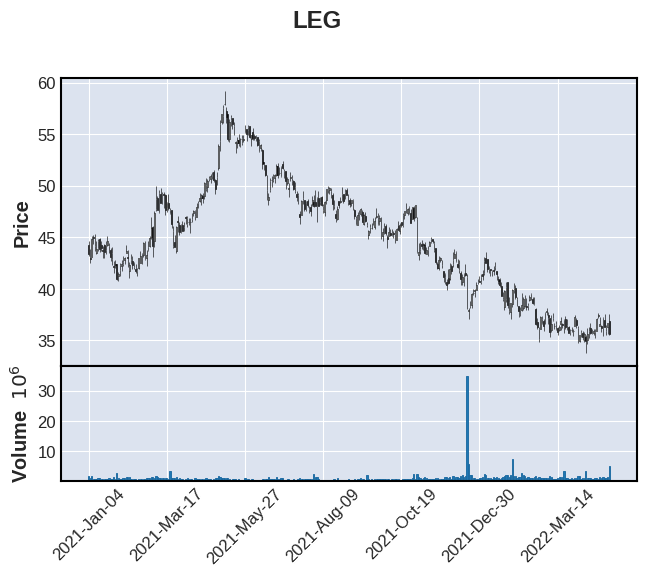

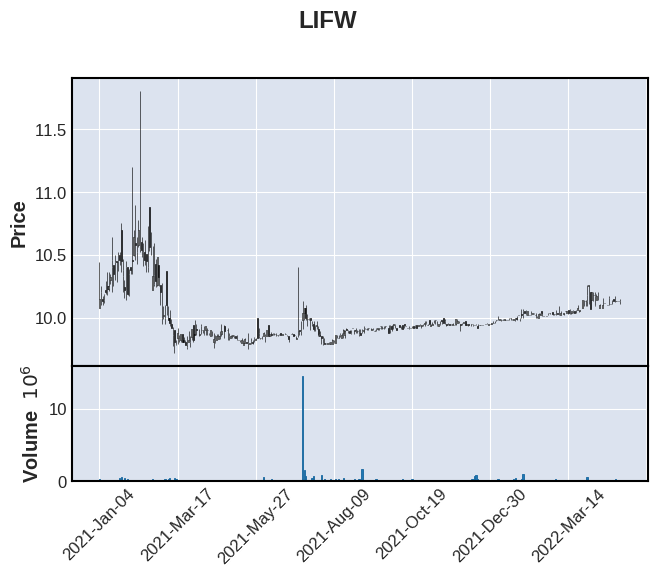

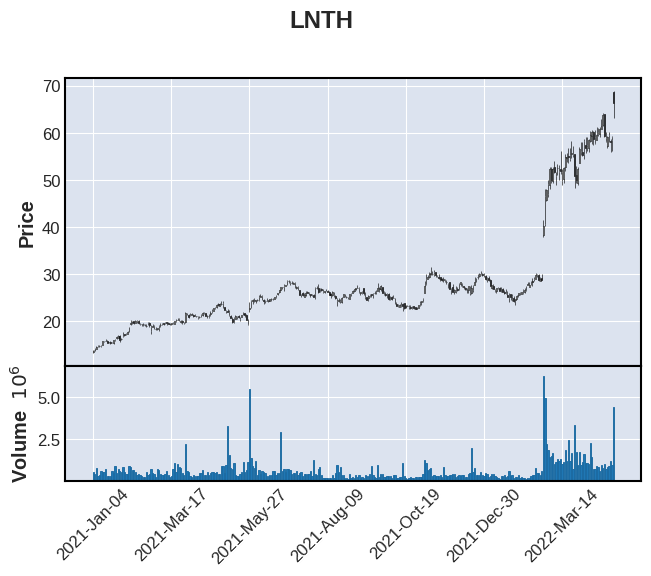

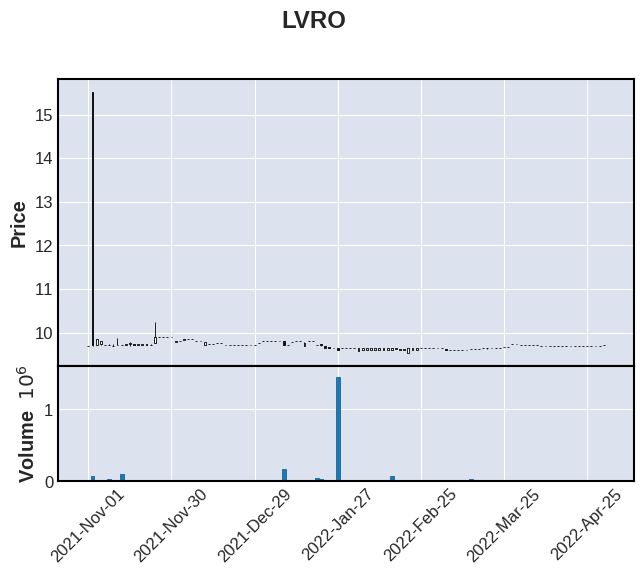

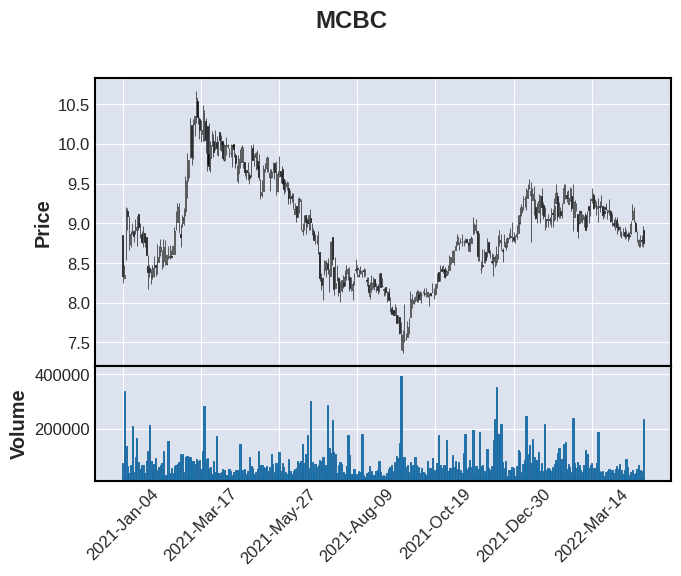

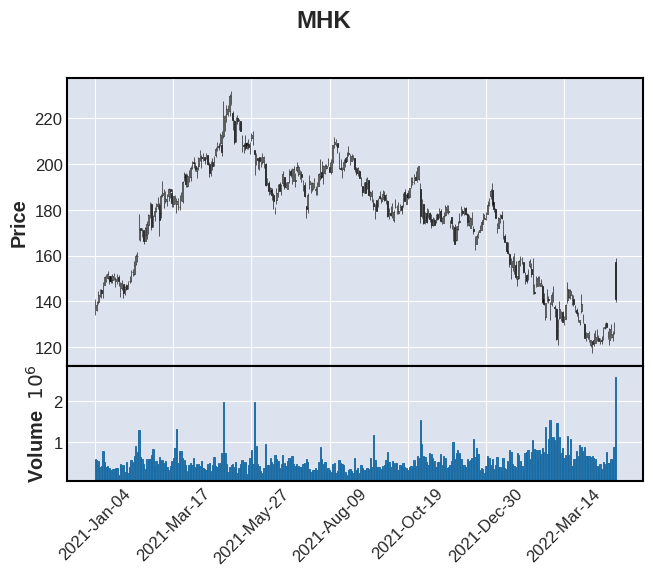

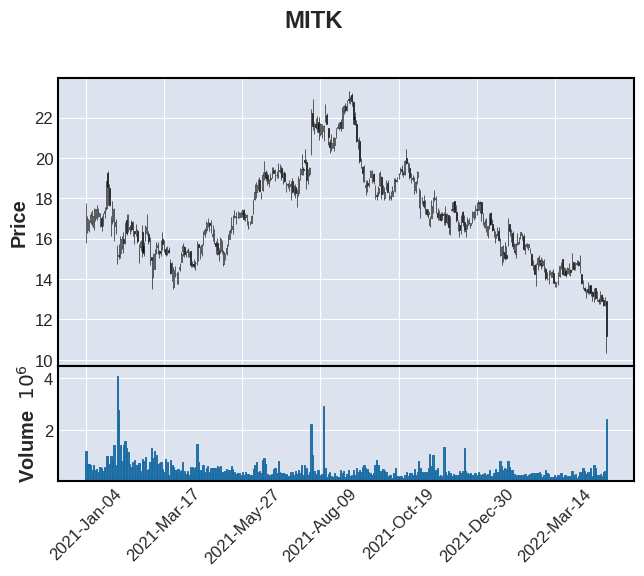

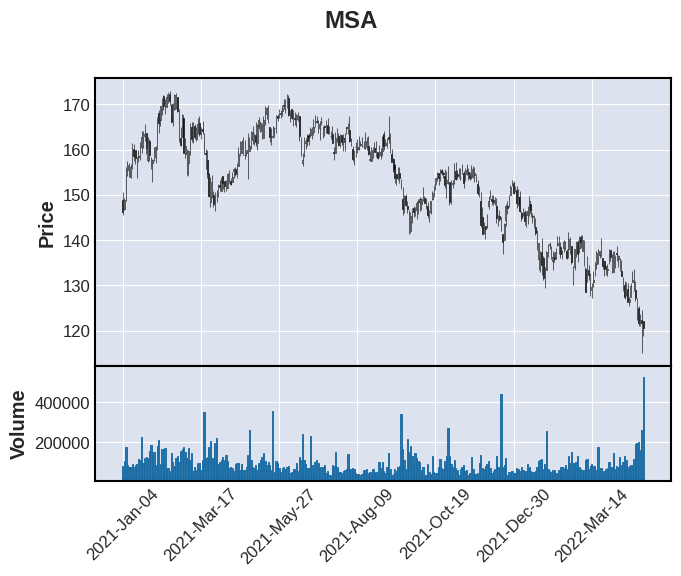

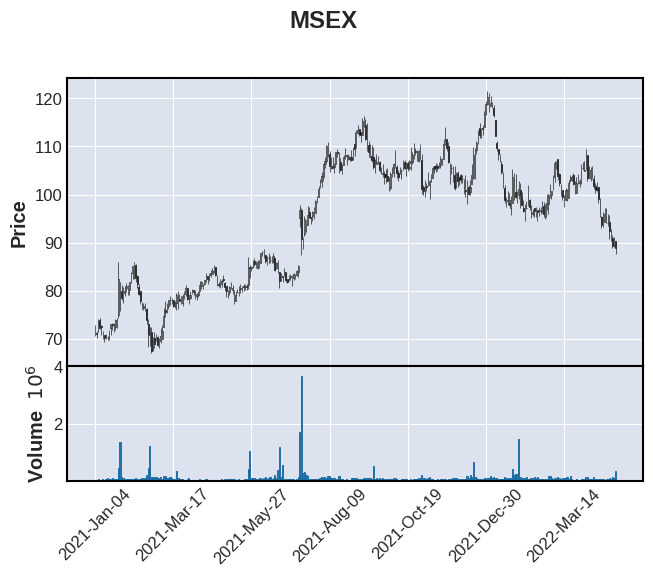

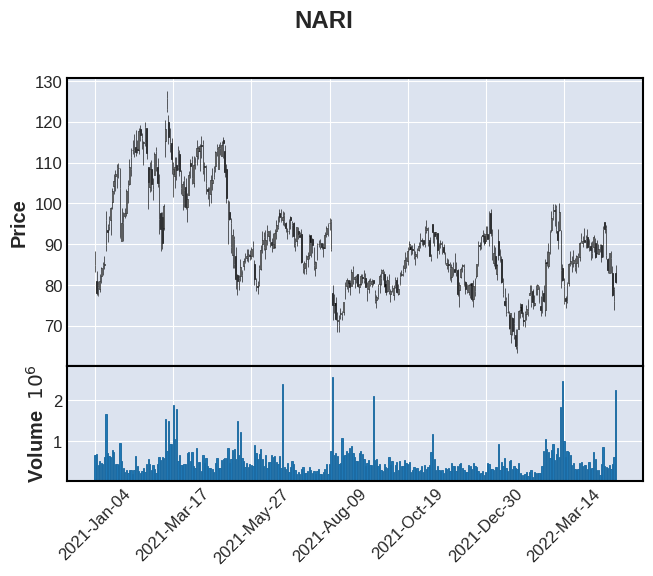

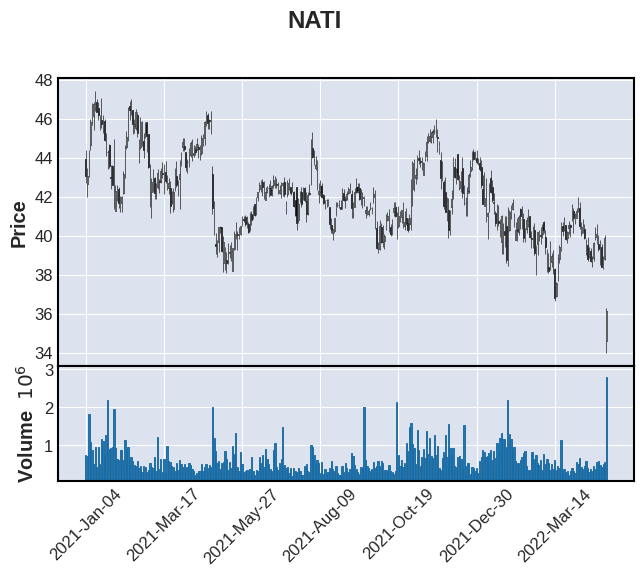

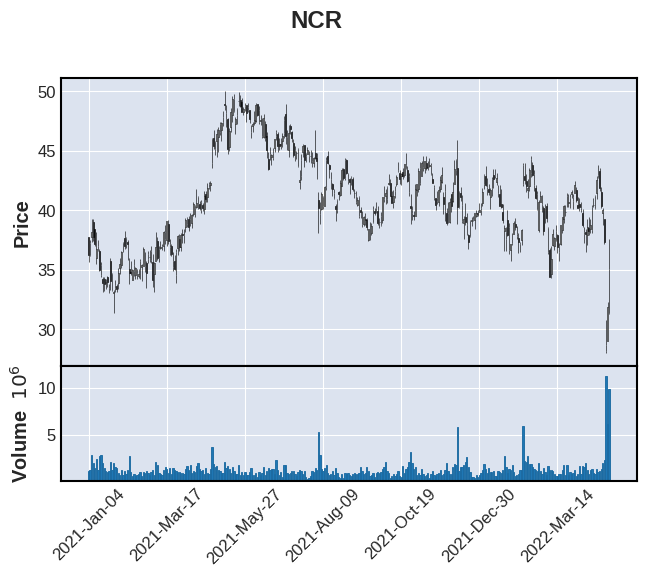

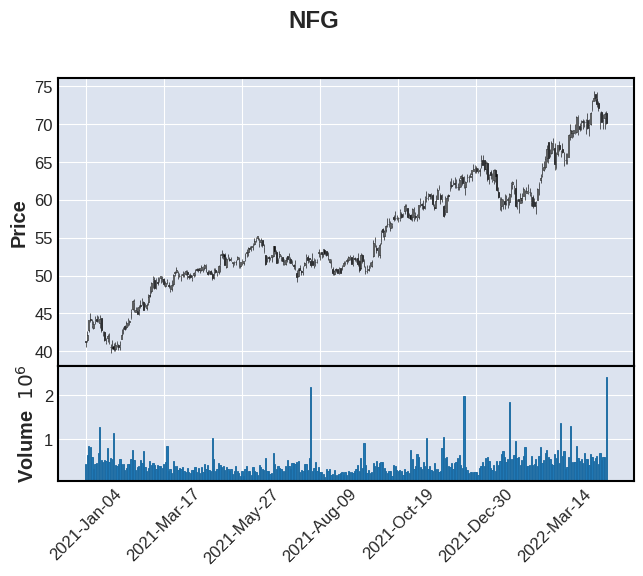

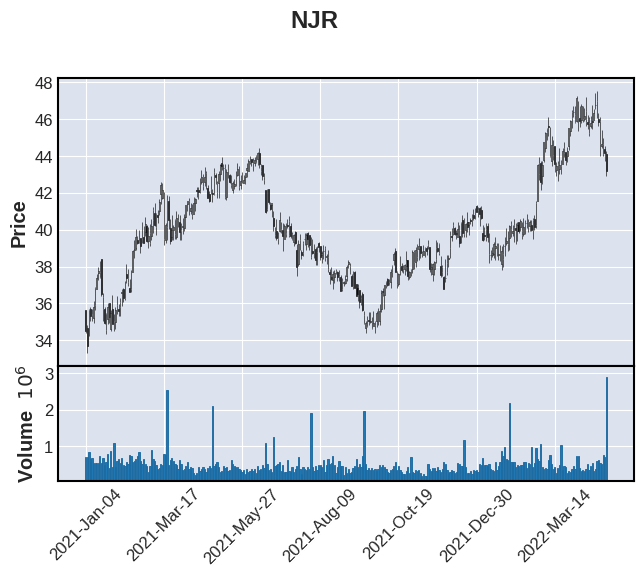

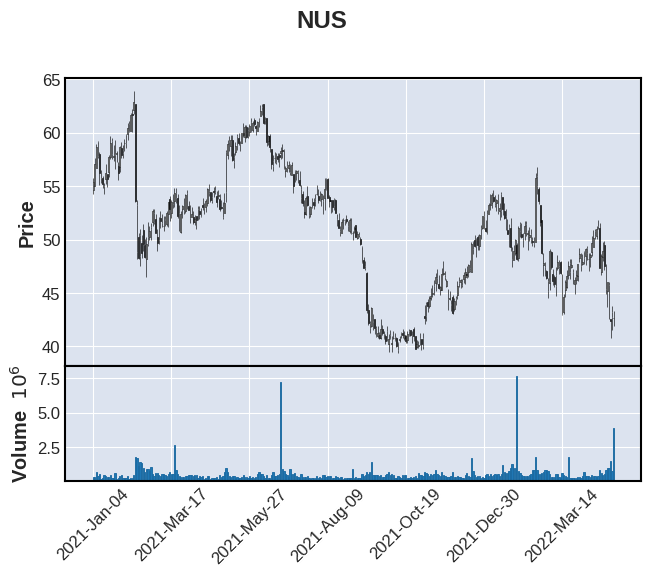

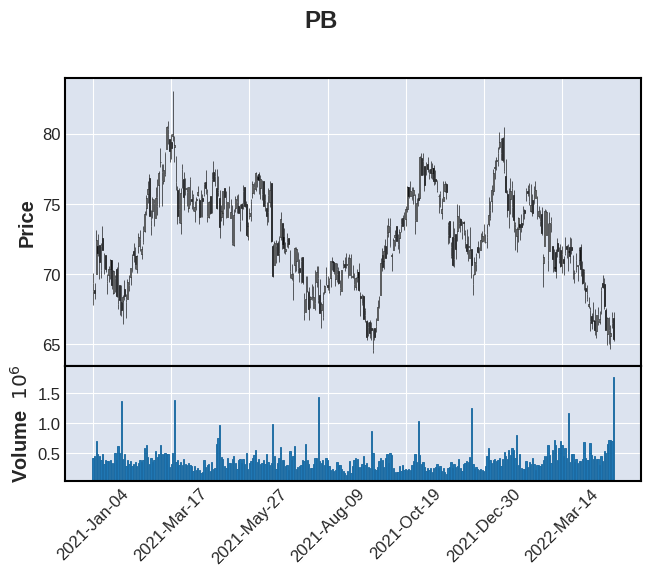

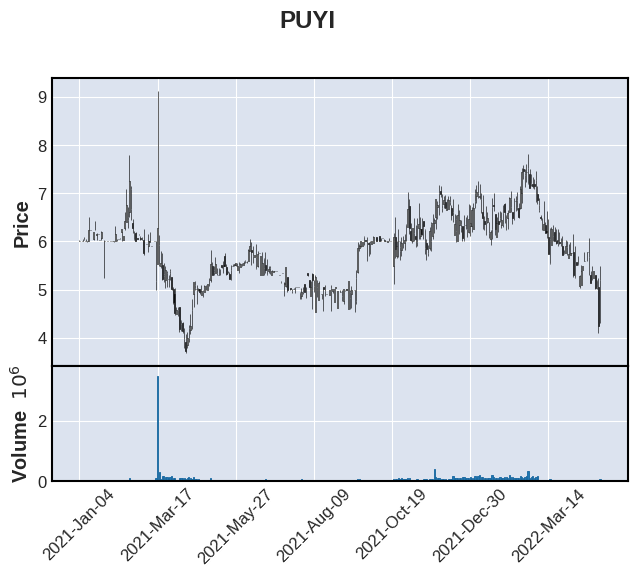

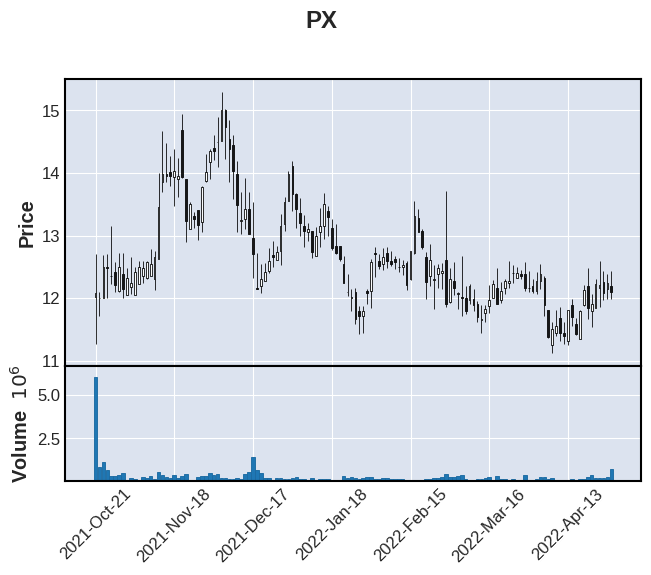

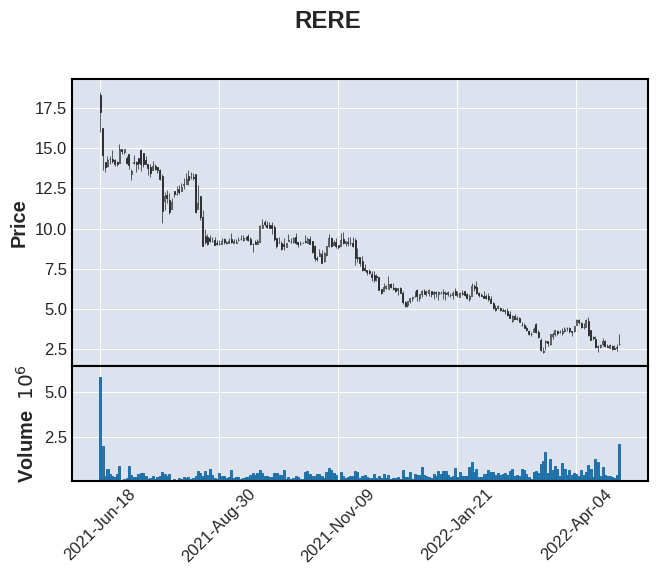

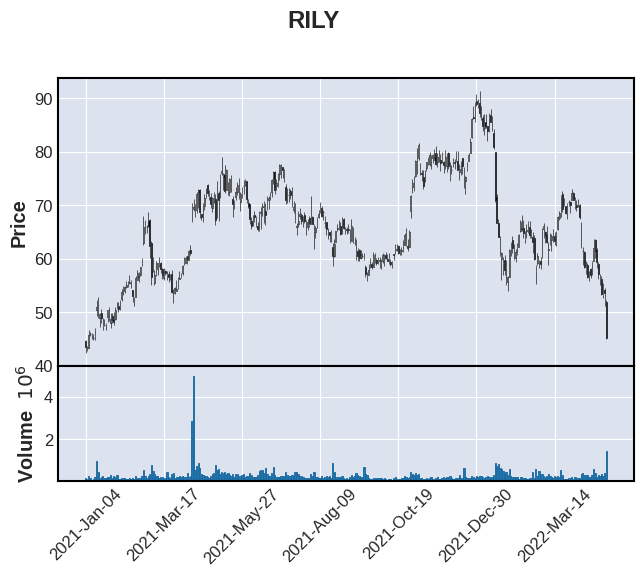

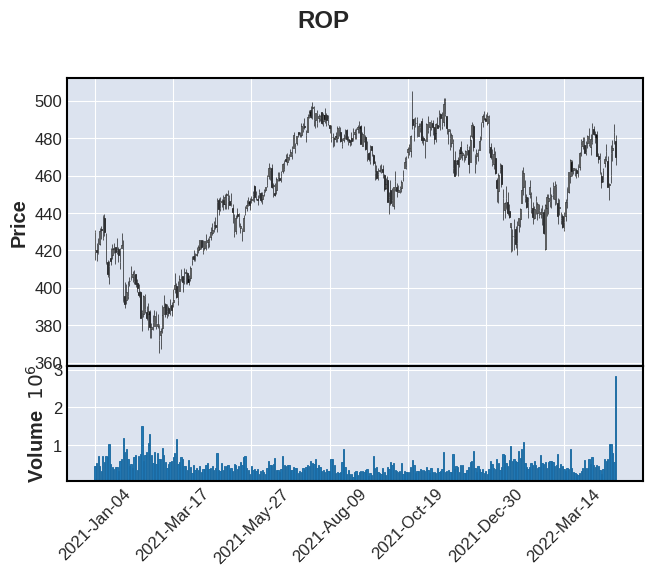

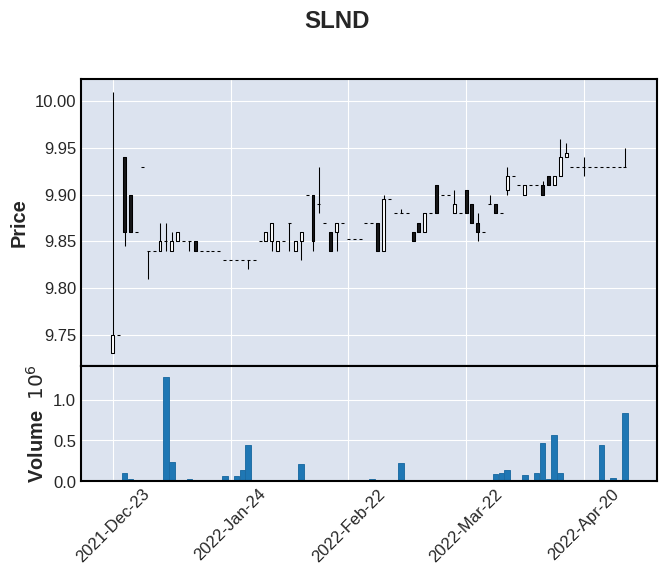

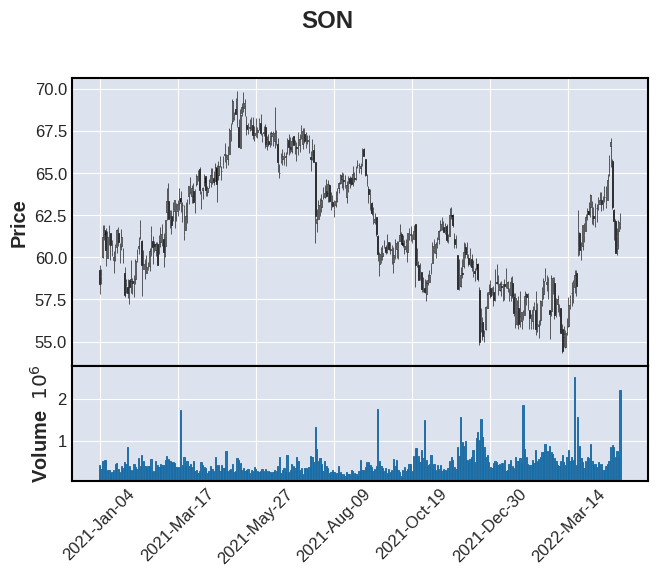

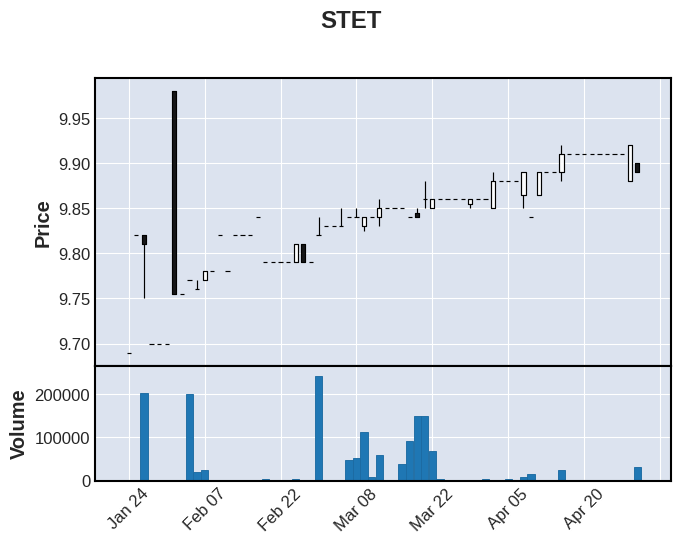

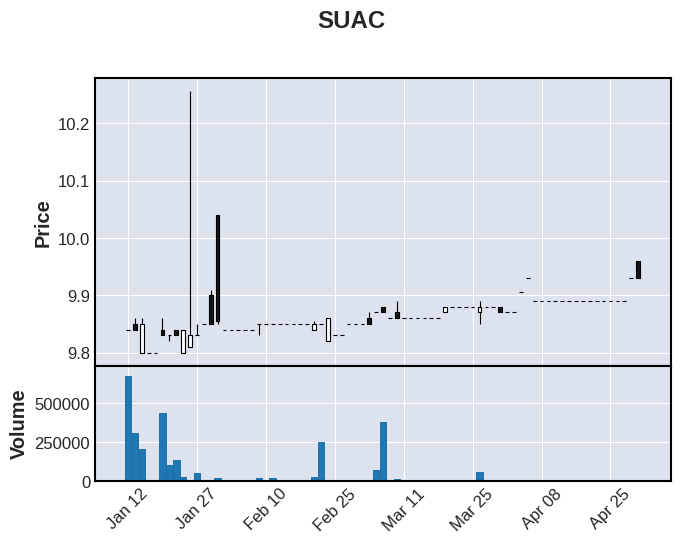

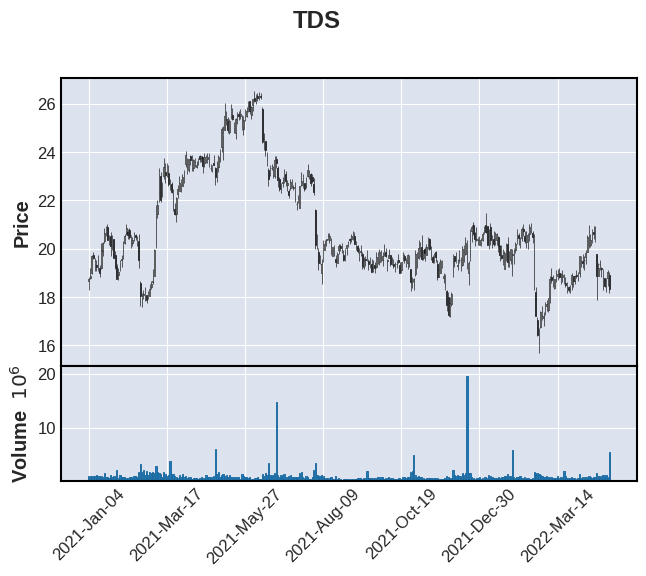

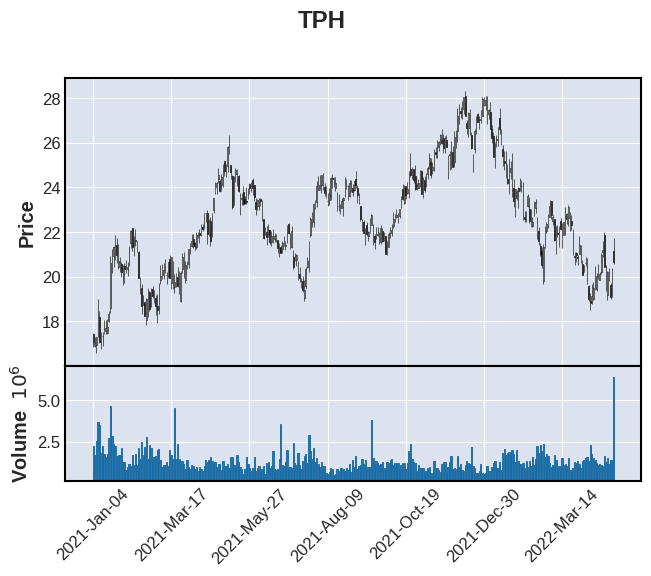

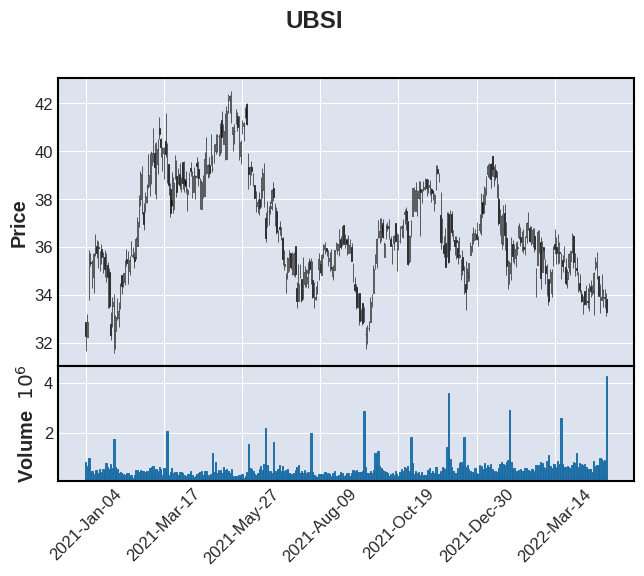

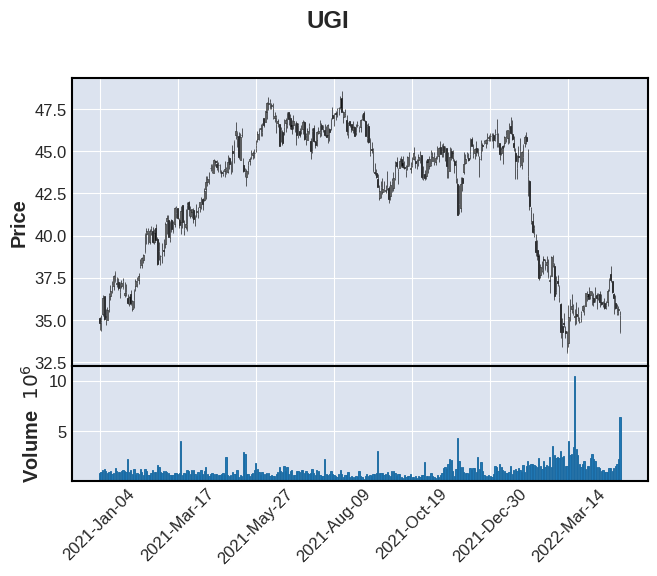

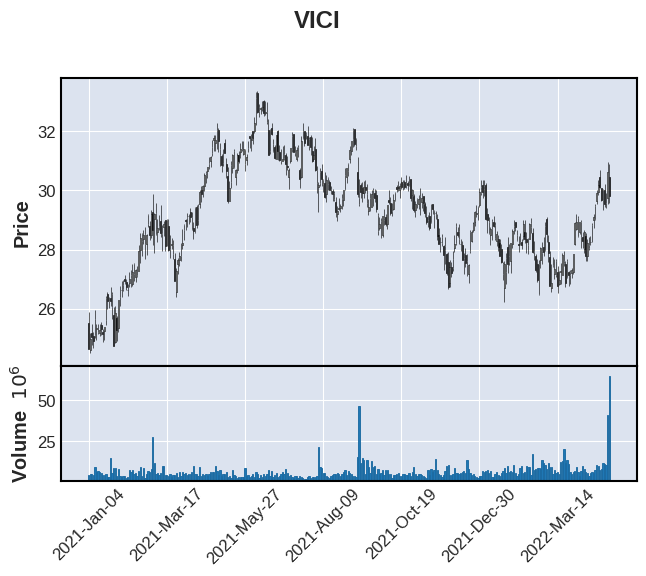

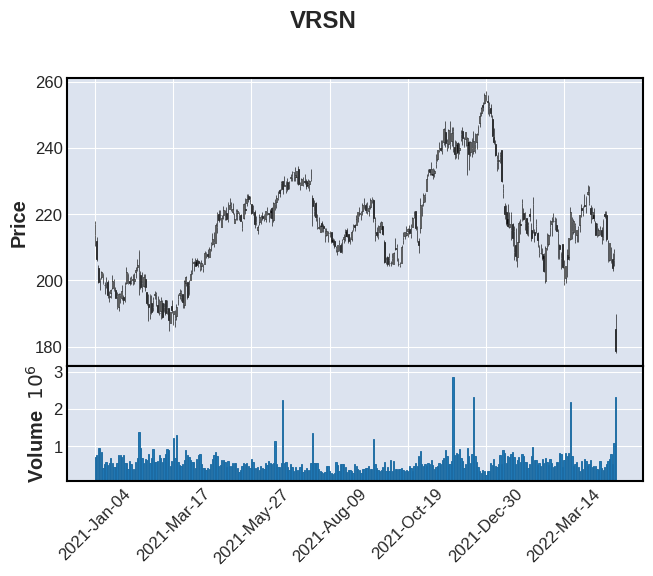

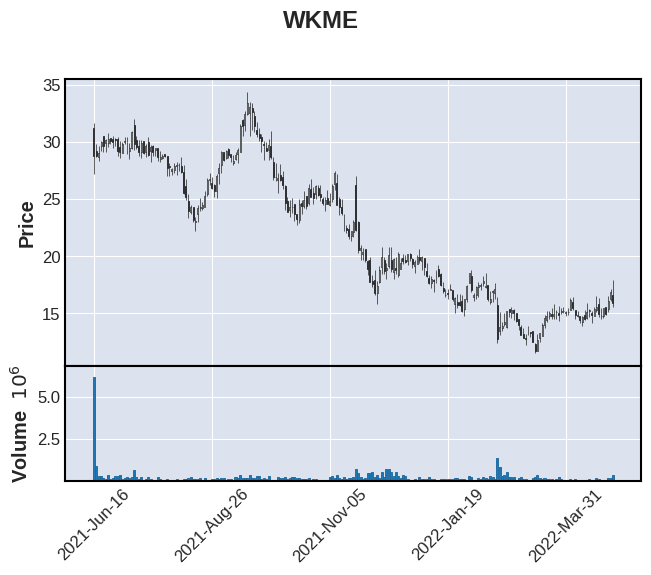

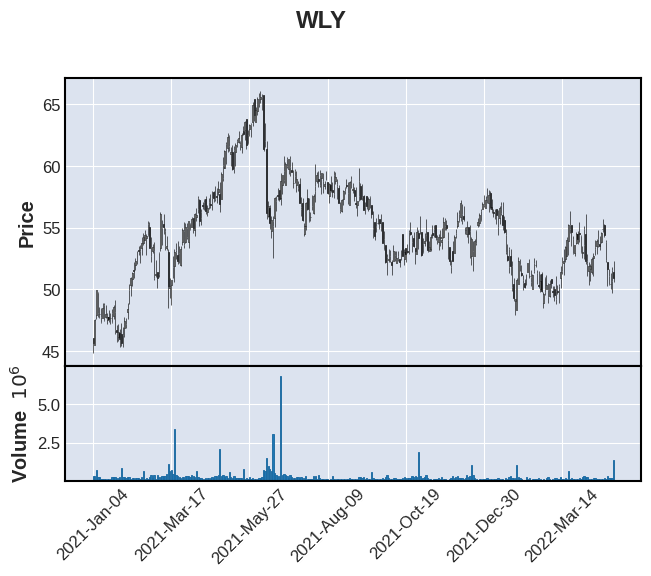

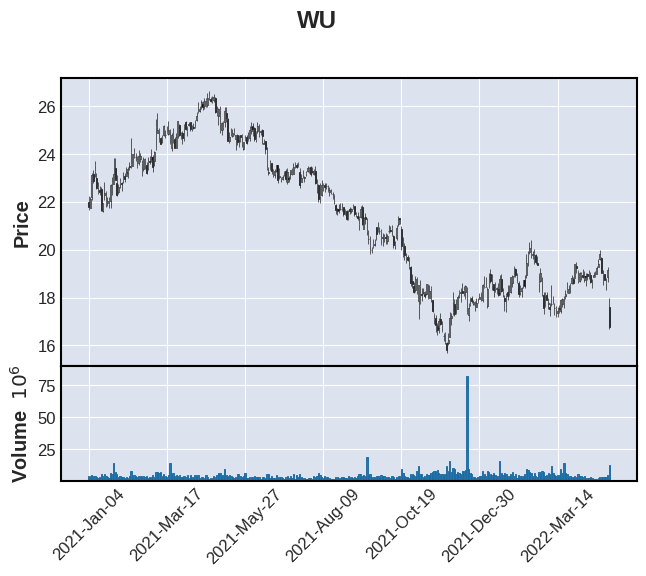

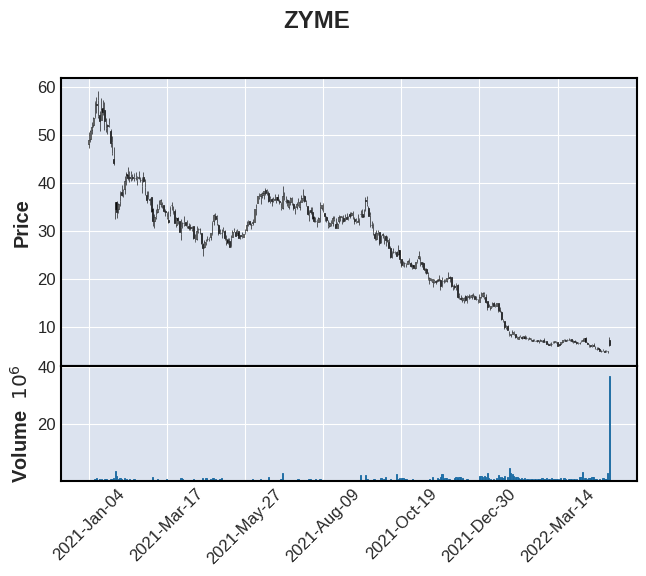

In [ ]:
import mplfinance as mpf

# Download the historical data for each target ticker and plot the candlestick chart
for ticker in target_tickers:
    data = yf.download(ticker, start="2021-01-01", end="2022-04-30", interval="1d", progress=False)
    mpf.plot(data, type='candle', volume=True, title=ticker)